# Analyse en composante principale

C'est une  technique pour réduire la dimension des données:

* pour les compresser
* pour les débruiter
* pour les visualiser.

Commençons modestement par passer de $\mathbb R^3$ à $\mathbb R^2$.

In [1]:
#téléchargeons les données
import os
if not os.path.exists("assets_alea"):
    !git clone https://github.com/vincentvigon/assets_alea
else:
    print("data already here")

In [38]:
%reset -f

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn.decomposition
import matplotlib.pyplot as plt
from IPython.display import Image


np.set_printoptions(suppress=True,precision=2)


## Préliminaire: Décomposition en valeurs singulières (SVD)



### Utilitaire graphique

In [40]:

#import matplotlib.patches as patches

" une fonction utilitaire pour dessiner des repères"
def showBasis(ax,vecs,lim=(-2,2),color0=(1,0,0),color1=(0,1,0), origine=(0,0)):
    "attention: c'est les colonnes de vecs qui sont les 2 vecteurs tracés"
    vec0=vecs[:,0]
    vec1=vecs[:,1]

    ax.set_aspect("equal")

    ax.arrow(origine[0],origine[1],vec0[0],vec0[1], head_width=0.1, head_length=0.2,color=color0)
    ax.arrow(origine[0],origine[1],vec1[0],vec1[1], head_width=0.1, head_length=0.2,color=color1)

    # plus simplement, sans les flèches, on peut faire
    #ax.plot([origine[0],origine + vec0[0]],[origine[1],origine + vec0[1]],'r')
    #ax.plot([origine[0],origine + vec1[0]],[origine[1],origine + vec1[1]],'g')

    # attention avec plt.arrow il faut nécessaire préciser le domaine (sinon c'est moche)
    ax.set_xlim(lim[0],lim[1])
    ax.set_ylim(lim[0],lim[1])

### Cas général $\triangleright$

La svd (singular value decomposition) est une factorisation en trois facteurs ayant des propriétés particulières.

***A vous:***  observez, déduisez quelles sont les propriétés de cette factorisation.

In [46]:
A=np.array([[1,2,3],[4,5,6]])
U,S,V = np.linalg.svd(A)

print("A\n",A)
print("U\n",U)
print("S\n",S)
print("V\n",V)

In [48]:
U@U.T

In [49]:
V@V.T

In [50]:
diag=np.zeros((2,3))
diag[0,0]=S[0]
diag[1,1]=S[1]

U@diag@V

### Interprétation géométrique


Considérons une application linéaire $T : \mathbb R^m \to \mathbb R^n$, associée à la matrice $A$. On peut trouver des bases orthonormales de $\mathbb R^m$ et  $\mathbb R^n$ telles que $T$ associe au i-ème vecteur de base de $\mathbb R^n$ un multiple positif du i-ème vecteur de base de $\mathbb R^m$, les vecteurs restants (dans le cas $m>n$) ont pour image 0.


Ainsi en considérant ces bases particulières, l'application $T$ s'interprète très facilement.




#### ♡♡♡


 Quel est le lien entre le texte précédent et la formule `U,S,V = np.linalg.svd(A)`. Indiquez précisément quelles sont les bases. Aide:

* Il y a un piège. Pour l'éviter posez $W=V^T$.
* on travaille avec la multiplication à droite, donc les vecteurs sont à dessiner en colonne.
* Notez  $u_i$ la $i$-ième colonnes de $U$
* Notez  $w_i$ la $i$-ième colonnes de $W$
* Quel est la propriété des familles de vecteurs $(u_i)_{i<m}$ et $(w_i)_{i<n}$?




### Graphiquement dans le cas $m=n=2$


Considérons $A$ une matrice $2\times 2$. Observons l'effet de application $T : \mathbb R^2 \to \mathbb R^2, x \to Ax$ sur un vecteur quelconque (point bleu) et sur la base canonique:


In [51]:
def showPoint(ax,point):
    ax.plot(point[0],point[1],'.')

fig,ax=plt.subplots(1,2)

"""matrice de l'application"""
A=np.array([[1,-1],[-0.7,0.1]])
"""observons comment elle transforme la base canonique et un point """
vecs=np.eye(2)
point=np.array([0.5,1])

"on utilise ici une fonction utilitaire définie tout au début"
showBasis(ax[0],vecs)
showPoint(ax[0],point)

showBasis(ax[1],A@vecs)
showPoint(ax[1],A@point)

In [53]:
""" observons maintenant les transformations pas à pas """
U,S,V = np.linalg.svd(A)


fig,ax=plt.subplots(1,4,figsize=(16,8))
showBasis(ax[0],vecs)
showPoint(ax[0],point)

showBasis(ax[1],np.eye(2),color0=(0,0,1),color1=(0,0,1))
showBasis(ax[1],V@vecs)
showPoint(ax[1],V@point)

showBasis(ax[2],np.diag(S),color0=(0,0,1),color1=(0,0,1))
showBasis(ax[2],np.diag(S)@V@vecs)
showPoint(ax[2],np.diag(S)@V@point)

showBasis(ax[3],U@np.diag(S)@V@vecs) # ou bien a@vecs
showPoint(ax[3],U@np.diag(S)@V@point)# ou bien a@point

#### ♡♡

***A vous:***  Commentez:  à quel moment fait-on une isométrie (laquelle?), une dilatation?

### Unicité

Il n'y a pas unicité de la décomposition en trois terme $A=USV$ avec  $U,V$ orthogonale et $S$ diagonale. On peut notamment construires plusieurs variations en permutant avec la même permutation, les colonnes de $U$ et celles de $W=V^T$.



 Cepandant nous allons appeler 'svd' la procédure informatique   qui à toute matrice $A$ elle associe un choix de  $U,S,V$ avec  $U,V$ orthogonale et $S$ diagonale, et ce choix est fait pour que les éléments de $S$ soient rangés dans l'ordre décroissant: $S_0>S_1>...$






### Cas symétrique défini positif


#### ♡♡

***A vous:*** Montrez que quand $A$ est symmétrique alors la svd donne une diagonalisation de $A$. Mais pas n'importe quelle diagonalisation!

In [8]:
""" prenons une matrice symétrique, diagonalisons là"""
B=np.array([[2,-1],[-1,2]])

val_pr,vec_pr=np.linalg.eig(B)

print("B:\n",B)
print("val_pr:\n",val_pr)
print("vec_pr:\n",vec_pr)

#### ♡♡♡

***A vous:*** Vérifiez que toute matrice symmétrique $A$ peut s'écrire sous la forme $XX^T$. Dans ce cas $X$ est souvent appelé racine carré de $A$. La svd est d'ailleurs la procédure classique pour calculer la racine carrée d'une matrice.

### Application à une matrice de type $XX^T$.

Nous nous donnones une matrices symmétrique $A=XX^T$. Nous comparons la svd de $A$ avec celle de $X$.


In [55]:
X=np.random.randint(0,10,size=[3,10])
X

In [56]:
A=X@X.T
A

In [58]:
U, S2, V = np.linalg.svd(A)
print("U:\n",U)
print("S2:\n",S2)

In [59]:
U_, S_, V_ = np.linalg.svd(X)
print("U_:\n",U_)
print("S_:\n",S_)

#### ♡♡♡♡


***A vous:*** Expliquez  l'égalité entre `U` et `U_`. Trouvez une relation  entre `S2` et `S_`.

***Conclusion:*** Les valeurs singulières d'une matrice $X$ sont toujours les racines carrées des valeurs propres de $XX^T$.

## Qu'est-ce qu'une dataFrame



Un vecteur aléatoire $X \in \mathbb R^p$, c'est simplement une collection de $p$ variables aléatoires. Mathématiquement, on les dispose souvent en colonne:
$$
X= \begin{bmatrix}
X_0\\
X_1\\
\vdots\\
X_{p-1}
\end{bmatrix}
$$
Mais attention, en statistique, l'habitude est plutôt de les noter en ligne! Notamment si l'on dispose de plusieurs réalisations $X^{(0)},X^{(1)},...,X^{(i)}$ de $X$, on les disposera ainsi:
$$
\begin{pmatrix}
X^{(0)} \\
X^{(1)}\\
\vdots\\
X^{(i)}\\
\end{pmatrix}=
\begin{pmatrix}
\begin{bmatrix}X^{(0)}_0 & \dots & X^{(0)}_{p-1}\end{bmatrix}\\
\begin{bmatrix}X^{(1)}_0 & \dots & X^{(1)}_{p-1}\end{bmatrix}\\
\vdots\\
\begin{bmatrix}X^{(i)}_0 & \dots & X^{(i)}_{p-1}\end{bmatrix}
\end{pmatrix}
$$
Cette disposition des données s'appelle une ***dataFrame***. Imaginons que le vecteur aléatoire représente les caractérisitiques d'un individu (poids, taille, QI,...). Alors:

*  chaque ligne de la dataFrame représente un individu
*  chaque colonne représente une caractéristique

Cependant, pour simplifier le lien avec l'algèbre linéaire, nous n'adoptons pas la convention de la dataFrame: les réalisations des vecteurs seront rangées dans les colonnes d'une matrice `X`.
$$
\begin{pmatrix}
X^{(0)} &
X^{(1)}&
\dots&
X^{(i)}
\end{pmatrix}=
$$
$$
\begin{pmatrix}
\begin{bmatrix} X^{(0)}_0 \\ \vdots\\ X^{(0)}_{p-1} \end{bmatrix}&
\begin{bmatrix} X^{(1)}_0 \\ \vdots\\ X^{(1)}_{p-1} \end{bmatrix}&
\dots&
\begin{bmatrix} X^{(i)}_0 \\ \vdots\\ X^{(i)}_{p-1} \end{bmatrix}&
\end{pmatrix}
$$


On parlera alors de dataFrame-transposée




Par exemple,  si `nbData=5` est le nombre de simulations,
chaque vecteur étant de dimension 3,
cela donne une matrice $3\times5$:

    [
     V0    V1   V2    V3   V4
     .     .    .     .    .
     .     .    .     .    .
     .     .    .     .    .
    ]



## Des données de dimension 3


Pour garder la surprise, dans un premier temps, ne regardez pas en détail la manière dont on génère les données ci-dessous.





In [60]:
#@title Simulation des données (secret)
def create_gaussianData():
    nbData=400

    cov01=5
    cov02=-2

    sigma2=np.array([
        [20,    cov01,  cov02],
        [cov01, 2,      0],
        [cov02, 0,      0.1]
    ])

    """peut-on choisir n'importe quelles valeurs pour cov01 et cov02 ?"""
    U,S2,U_T = np.linalg.svd(sigma2)
    S_diag=np.diag(np.sqrt(S2))
    sigma=U @ S_diag @ U_T
    gauss_stand=np.random.normal(size=[3,nbData])
    return sigma@gauss_stand


"formule d'Euler-Rodrigues pour faire une matrice de rotation selon un axe donné"
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians.
    """
    axis = np.asarray(axis)
    axis = axis / np.sqrt(np.dot(axis, axis))
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])


def create_surpriseData():
    m = 400
    w1, w2 = 0.1, 0.3
    noise = 0.2

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    X = np.empty((m, 3))
    X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

    axis = [-1, 2 , 1]
    theta = 1.2
    R=rotation_matrix(axis, theta)

    return 10*R @ X.T

In [61]:
#X=create_gaussianData()
X= create_surpriseData()
print("X.shape",X.shape)

### Observons avec matplotlib

In [62]:
"""Observons les données dans leur ensemble, avec un tracé 3D """
from mpl_toolkits.mplot3d import Axes3D,proj3d

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(X[0,:],X[1,:],X[2,:],'.');

In [63]:
"""observons les 3 lois marginales"""
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(10,2),sharey=True)
ax0.hist(X[0,:],edgecolor="k")
ax1.hist(X[1,:],edgecolor="k")
ax2.hist(X[2,:],edgecolor="k");

Observons les coordonnées deux par deux:

In [64]:
fig,ax=plt.subplots()
ax.set_aspect('equal')
ax.plot(X[0,:],X[1,:],'.')
plt.title(r"$0 \to 1$");

In [65]:
fig,ax=plt.subplots()
ax.set_aspect('equal')
ax.plot(X[0,:],X[2,:],'.')
plt.title(r"$0 \to 2$");

In [66]:
fig,ax=plt.subplots()
ax.set_aspect('equal')
ax.plot(X[1,:],X[2,:],'.')
plt.title(r"$1 \to 2$");

### Observons avec seaborn

In [67]:
"pandas s'attend à une dataFrame => il faut transposer X"
df=pd.DataFrame(data=X.T)
sns.pairplot(df);

#### ♡♡

***A vous:*** La visualisation ci-dessus est jolie, mais elle est très trompeuse pour visualiser la dispersion des points. Pourquoi?  Aide: comparez avec les tracés précédents.

## Première ACP

### Diagonalisons la covariance $\triangleright$

In [72]:
"attention, si X était une dataFrame, il faudrait faire np.cov(X.T)"
cov=np.cov(X)
print("cov\n",cov)
U,S2,V=np.linalg.svd(cov)

La fonction `np.cov`  donne l'estimation de la matrice covariance. Ses coefficients sont donnés par
$$
cov[i,j] = \frac{1}{m-1} \sum_{k=0}^{m-1} (X[i,k] - \mu[i])(X[j,k] - \mu[j]),
$$
où $m$ est le nombre de points et $\mu[i] = \frac{1}{m} \sum_k X[i,k]$ la moyenne empirique de `X[i,:]`.



Matriciellement:
$$
cov = \frac{1}{m-1} (X-\mu) (X-\mu)^T
$$
Attention, dans le cas d'une présentation "dataFrame", la formule serait:
$$
cov = \frac{1}{m-1} (X-\mu)^T (X-\mu)
$$

#### ♡♡♡

***A vous:*** Recalculez la matrice `cov` avec numpy sans utilser `np.cov`: simplement en effectuant le produit matriciel ci-dessus.

### Calculons le meilleur plan

Considérons la décomposition en valeurs singulières de la matrice de covariance, en notant $S^2$ le vecteur des valeurs singulières: informatiquement:

    U, S2 UT = svd(cov)

Matriciellement:
$$
\text{cov}= U I_{S^2} U^T
$$
Le repère $U_0,U_1,U_2$ composé des trois colonnes de $U$ représente les principales directions du nuage des simulations. Ces directions sont ordonnées par ordre décroissant d'importance, le grand axe du nuage étant $U_0$.  Pour observer au mieux le nuage en 2D, il faut le projeter sur le plan engendré par $U_0,U_1$, donc le plan orthogonal à $U_2$.

Mais attention, quand le nuage n'est pas centré:
* soit on considère le plan affine passant par l'espérance $\mu$.
* soit on centre le nuage en soustrayant $\mu$, et on considère le plan vectoriel passant par zéro.

On préfère en général la seconde option. L'équation du plan est donc $ax+by+cz=0$ avec $[a,b,c]=U_2$ (le troisième vecteur de la base $U$).


In [74]:
def draw_plan_and_data(normal,X):

    # on crée la grille correspondant au plan de base z=0.
    lim=15
    xx, yy = np.meshgrid(np.linspace(-lim,+lim,10),np.linspace(-lim,+lim,10))

    #  on calcule les altitudes z
    z = (-normal[0] * xx - normal[1] * yy) * 1. / normal[2]

    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    ax1.view_init(30,60)
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    ax2.view_init(30,90)

    for ax in [ax1,ax2]:
        ax.plot_wireframe(xx,yy,z,rstride=1, cstride=1)
        ax.plot(X[0,:], X[1,:], X[2,:], 'r.')


normal=U[:,2]
draw_plan_and_data(normal,X)


### Nuage projeté en 2D


Un peu d'algèbre linéaire: la base fournie par la svd est donnée par les 3 colonnes de $U$ que nous appelons $U_0,U_1,U_2$. Tout point s'écrit
$$
x = \alpha_0 U_0 + \alpha_1 U_1 +\alpha_2 U_2 =  U \alpha
$$
(où $U \alpha$) est la multiplication matrice-vecteur.

Donc, en utilisant le fait que $U^T=U^{-1}$,  les trois coordonnées de $\alpha$ s'obtiennent par:
$$
\alpha =  U^T x
$$
Si l'on projette $x$ dans le meilleur plan, on obtient simplement $(\alpha_0,\alpha_1)$.

Effectuons cela sur tous nos points, rangés dans la matrice $X$:

In [75]:
alpha=U.T @ X  # c'est les 'alpha' de la théorie

""" la base canonique, un peu agrandie """
axis=np.diag([10,10,10])
changed_axis=U.T @ axis


fig,ax=plt.subplots()
ax.set_aspect("equal")
lim=15
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)

ax.plot(alpha[0,:],alpha[1,:],'.')


colors=np.diag([1,1,1])
for i in range(3):
    plt.arrow(0, 0, changed_axis[i,0], changed_axis[i,1], head_width=0.1, head_length=0.2,color=colors[i,:])
    plt.text(changed_axis[i,0]* 1.15, changed_axis[i,1] * 1.15, "ax"+str(i), color = 'k', ha = 'center', va = 'center')


Ci-dessus, c'est un dessin très classique de l'analyse de données: les flèches représentent la base canonique projetée sur le meilleur plan.

### Nuage projeté en 3D $\triangleright$


Représentons maintenant nos points sans leur composante en $U_2$ (car c'est la moins importante). On doit donc afficher les points
$$
x_{trunc}= \alpha_0 U_0 + \alpha_1 U_1 = U \begin{pmatrix} \alpha_0 \\ \alpha_1 \\ 0 \end{pmatrix}
$$

In [76]:
alpha_01=alpha.copy()
alpha_01[2]=0
X_trunc=  U @ alpha_01
draw_plan_and_data(normal,X_trunc)

En comparant les graphiques, on a l'impression que les nuages projetés sont moins dispercés que les nuages initiaux: je pense que c'est un pur effet de la projection 3d.

#### ♡♡♡

***A vous:*** Petit exo de géométrie euclidienne: calculez $ la distance euclienne entre les `X` et les `X_trunc` à partir du vecteur `alpha`.


On peut calculer la distance euclienne entre les `X` et les `X_trunc` : la base $(U_0, U_1, U_2)$ étant orthonormée, on peut appliquer la formule usuelle de la distance euclidienne sur les coordonnées de `X` et de `X_trunc` dans cette base, à savoir $(\alpha_0, \alpha_1, \alpha_2)$ et $(\alpha_0, \alpha_1, 0)$, pour obtenir
$$
\sqrt{0^2 + 0^2 + (\alpha_2-0)^2} = |\alpha_2|
$$

### Avec sklearn

 Effectuons l'ACP avec la bibliothèque `sklearn` (on l'utilisera beaucoup par la suite).  La syntaxe peut vous paraitre obscure, de même que la syntaxe que nous avons utilisé précédemment peut paraitre obscure à un non-matheux.


In [77]:
#un objet qui va effectuer l'ACP
pca = sklearn.decomposition.PCA()
# sklearn veut une dataFrame et renvoie une dataFrame
alpha_sk = pca.fit_transform(X.T).T

In [78]:
#comparons
fig,(ax0,ax1)=plt.subplots(1,2)
ax0.plot(alpha_sk[0,:],alpha_sk[1,:],".")
ax0.set_title("technique sklearn")
ax1.plot(alpha[0,:],alpha[1,:],".")
ax1.set_title("à la main");

### Revenons sur l'inucité


***Question:***  Peut-on avoir une différence entre ce qu'on obtient avec `sklearn` et ce qu'on obtient avec `np.svd`?



* Si on dit que la décomposition en valeur singulières donne simplement deux bases orthogonales qui ont la propriété de "diagonaliser" la matrice alors on est loin de l'unicité:  Ces deux bases pourraient être permutées cela donnerait encore une décomposition.
* Mais on impose que les valeurs singulière (= valeurs propres) soient classées dans l'ordre décroissant: donc il n'y a un choix d'ordre à faire uniquement quand une valeur singulière apparait plusieurs fois.
* Une fois que l'on a fixé l'ordre des "directions" singulières, il y a encore à faire un choix sur le "sens" des vecteur associés.
* En général on décide de choisir le sens des vecteurs pour obtenir une base "directe": càd que le déterminant de $U$ soit égal à 1.
* Et même avec ce choix, il y a un choix de sens à faire pour le premier vecteur de la base.


Conclusion: Si on part d'une matrice $A$ issue de la vraie vie, il n'y a aucune chance pour qu'une valeur singulière apparaise deux fois. Donc les bases renvoyées par `sklearn` et `np.svd` ne peuvent différée que par un signe (je l'ai déjà observé).


In [79]:
U_sk=pca.components_.T
S2_sk=pca.explained_variance_

print("U_sk:\n",U_sk) #il met les vecteurs en ligne
print("U:\n",U)
print()
print("S2_sk:\n",S2_sk)
print("S2:\n",S2)

Comparons les résultats:
* Les vecteurs de la base $U$ sont identiques, éventuellement au signe près.
* Ces vecteurs pourraient ne pas être identiques, même au signe près. Expliquez en pensant à un nuage de points en forme de ballon de rugby $(1\heartsuit)$.


## Applications

###  Annalyse de données $\triangleright$

Nous observons le jeu de données `iris` étudié la première fois par Fisher, R.A. Il s'agit sans doute du jeu de données le plus célèbre au monde.  L'input `X` est constitué des 4 variables suivantes:
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

L'output `Y` correspond à 3 espèces d'iris:
* setosa
* versicolor
* virginica



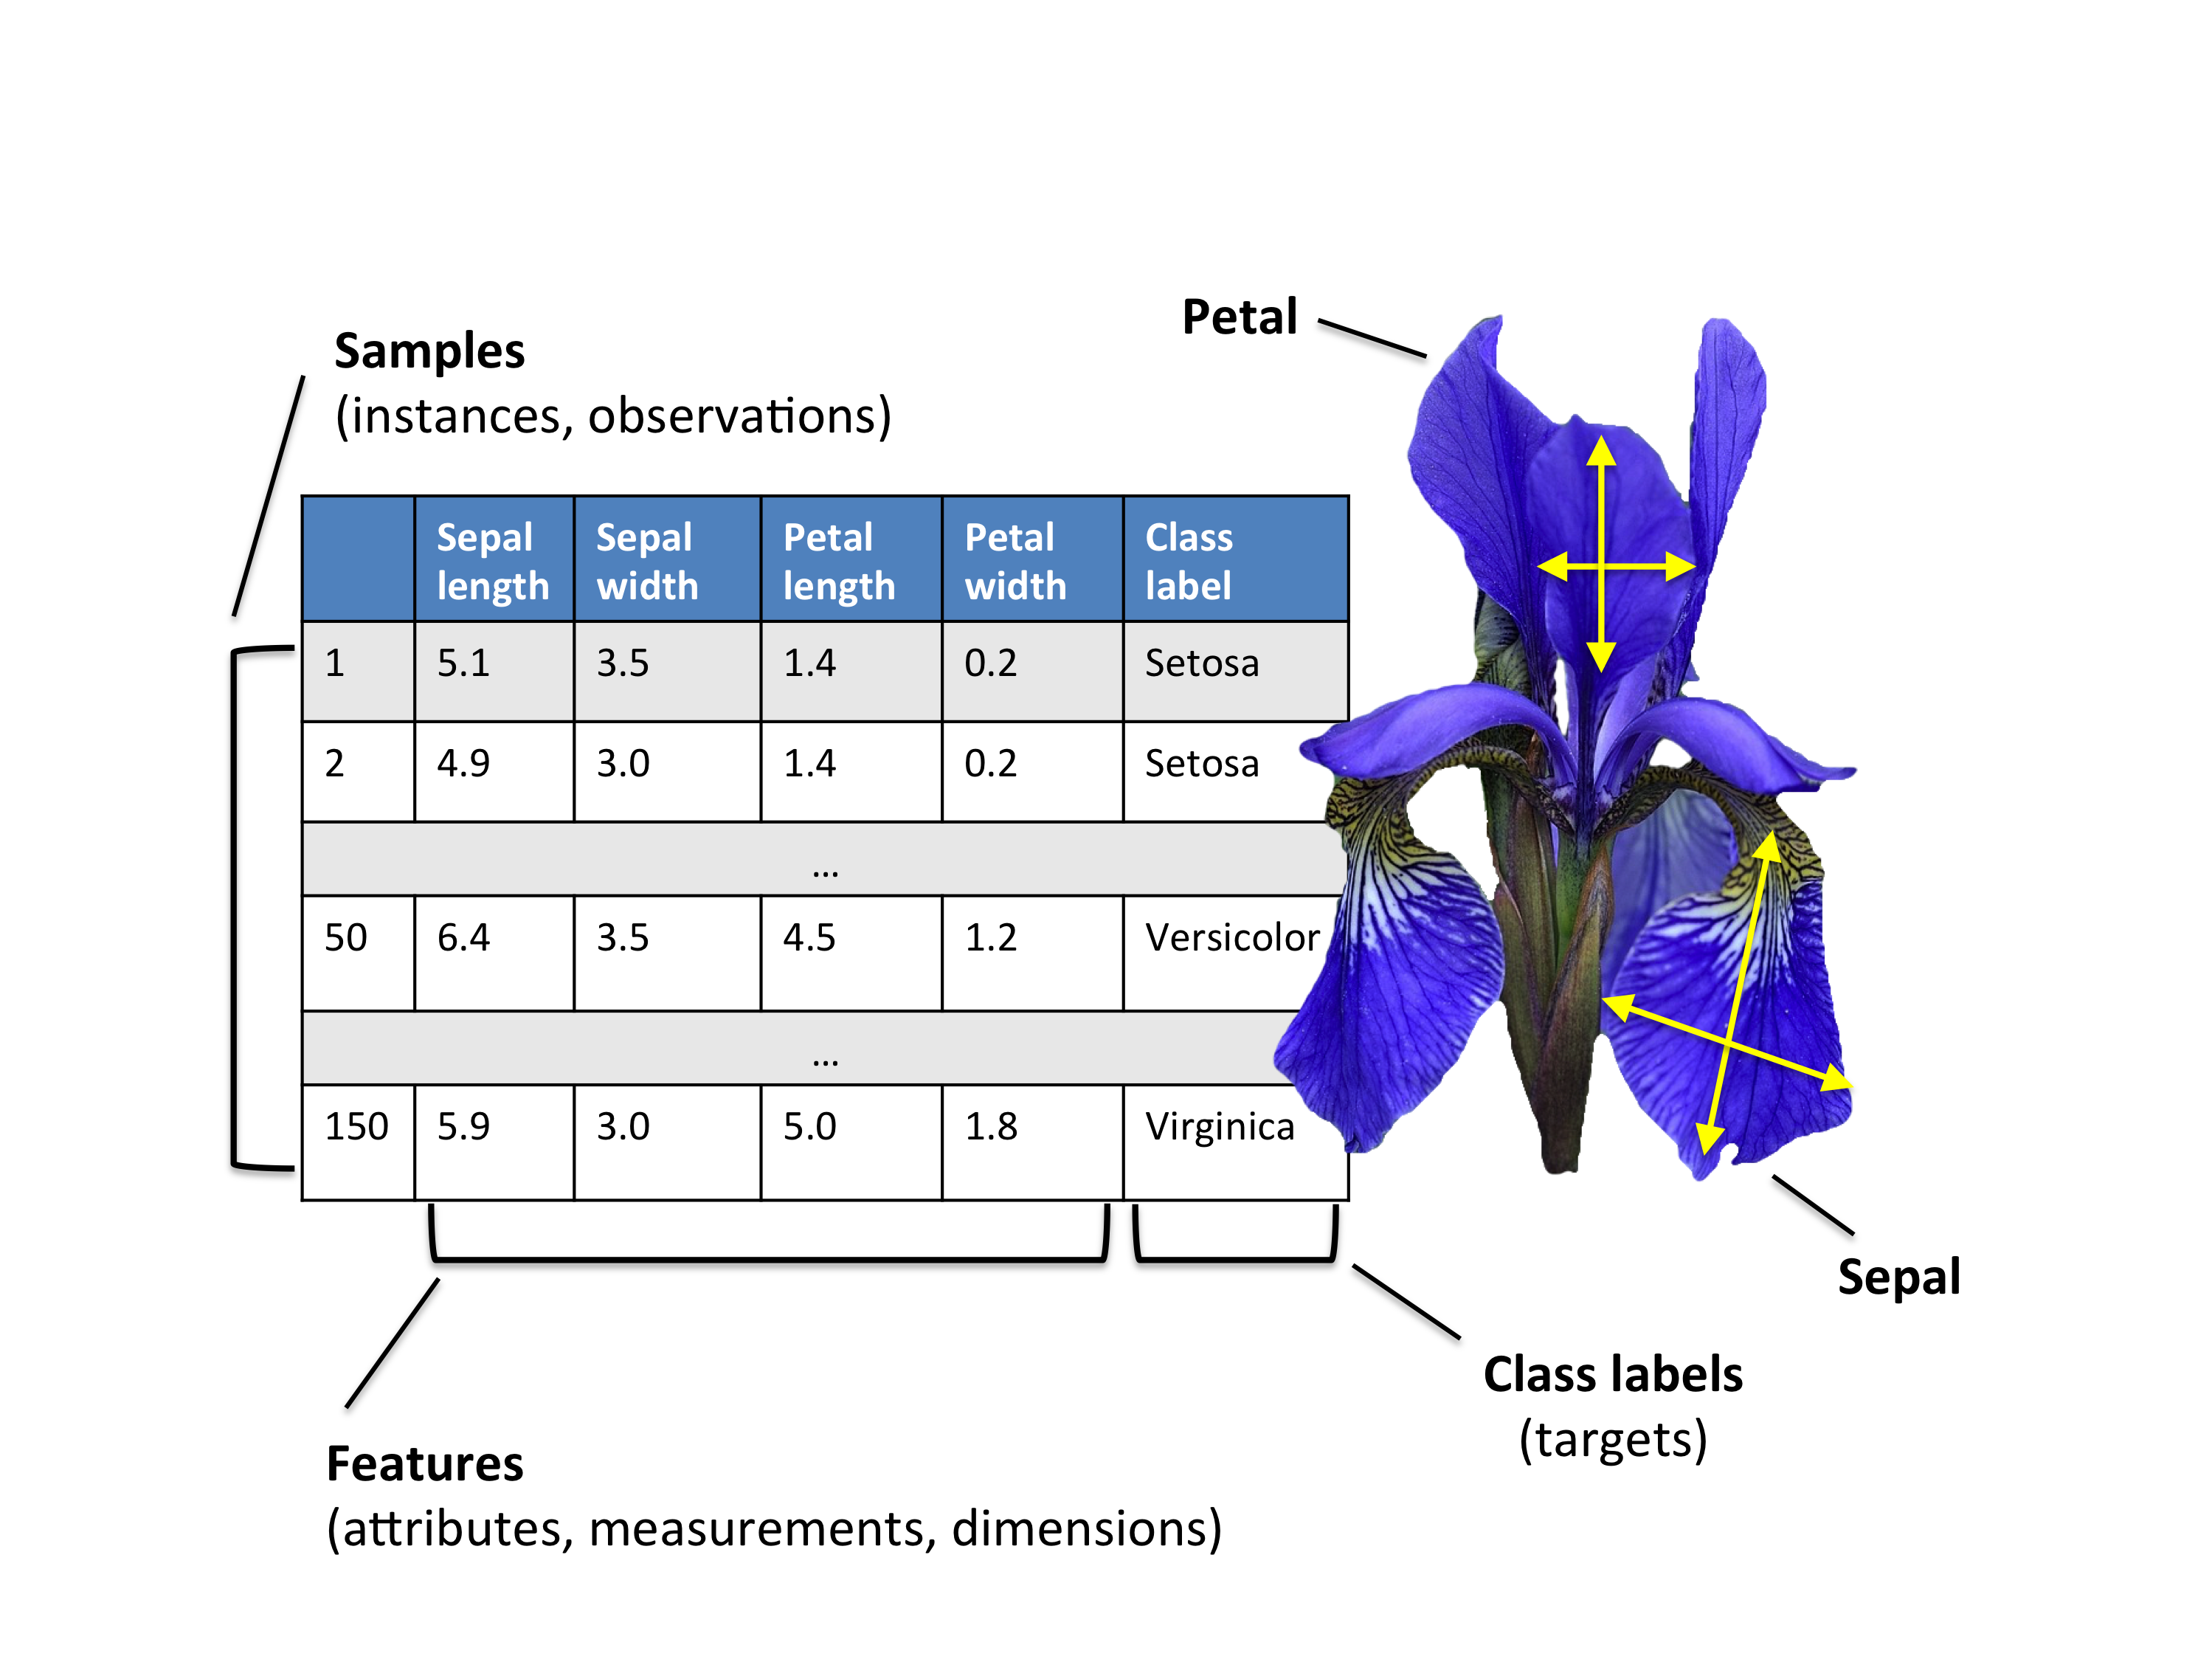

In [82]:
data=np.loadtxt("assets_alea/dataframe/iris.csv",delimiter=",")
print("data.shape:",data.shape)
print("data[:3]\n",data[:3,:])
X=data[:,:4].T
print("X.shape:",X.shape)
Y=data[:,4].astype(np.int64)
print("Y.shape:",Y.shape)
print("Y\n",Y)

Ce jeu de données est aussi inclus dans de nombreuses bibliothèques, comme `sklearn`. On peut donc le charger ainsi:

```python
    from sklearn import datasets
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
```
et avoir des tas d'informations en tapant
```python
    print(iris.DESCR)
```

In [83]:
input_names=["sepal_l","sepal_w","petal_l","petal_w"]
output_names=["setosa","versicolor","virginica"]

cov=np.cov(X)

U,S2,U_T=np.linalg.svd(cov)
print("cov\n",cov)

X_proj=U.T @ X  # c'est les 'alpha' de la théorie

plt.scatter(X_proj[0,:],X_proj[1,:],c=Y)
plt.grid()

#### ♡♡♡♡♡

***A vous:*** Rajoutez les 3 axes projetés. Mettez des légendes. Quel est l'input le plus discriminant pour classer les espèces? Quelle est la combinaison linéaire d'inputs qui est la plus discriminante?

In [84]:
#ºuntil
input_names=["sepal L","sepal W","petal L","petal W"]
output_names=["setosa","versicolor","virginica"]

cov=np.cov(X)

U,S,U_T=np.linalg.svd(cov)

X_proj=U.T @ X
color = ['r','g','b']

for i in range(3):
    plt.scatter(X_proj[0,Y==i],X_proj[1,Y==i],c=[color[i]]*np.sum(Y==i),label=output_names[i],alpha=0.3)
plt.grid()
plt.legend()

centre = np.mean(X_proj, axis=1)

b_can = np.eye(4)
b_can = U.T @ b_can
for i in range(4):
    plt.arrow(centre[0], centre[1], b_can[0,i], b_can[1,i], head_width=0.05, head_length=0.1)
    plt.text(centre[0]+ b_can[0,i]*1.15, centre[1] + b_can[1,i]*1.3, input_names[i], color = 'k', ha = 'center', va = 'center')

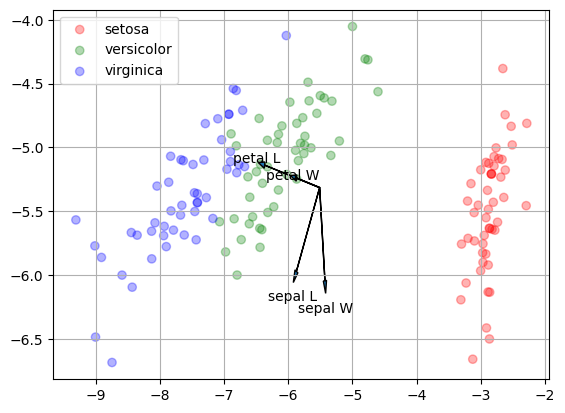

In [84]:
#--- To keep following outputs, do not run this cell! ---

### Compression d'image

Nous allons observer des images représentant des chiffres en écriture manuscrite. Chaque image a une résolution de $8\times 8$ pixels: on la  considère comme un vecteur de taille $\mathbb R^{64}$ (oui, imaginez que chaque image est un point de votre espace à 64 dimensions).  


In [86]:
import sklearn.datasets

digits = sklearn.datasets.load_digits()
print("digits.data.shape:",digits.data.shape)

def plot_digits(data):
    k=-1
    for i in range(2):
        for j in range(10):
            k+=1
            plt.subplot(4,10,k+1)
            img=data[k].reshape([8,8])
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])

plot_digits(digits.data)

In [87]:
pca = sklearn.decomposition.PCA(2)  # projection de 64 à 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0],
            projected[:, 1],
            c=digits.target,
            edgecolor='none',
            alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('direction 1')
plt.ylabel('direction 2')
plt.colorbar();

In [88]:
pca = sklearn.decomposition.PCA()  # on calcule maintenant toute la base
projected = pca.fit_transform(digits.data)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

#### ♡♡

***A vous:*** À quoi correspondent les deux tableaux précédents $(2\heartsuit)$?




In [89]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumsum)),cumsum)
seuil=0.9
d = np.argmin(cumsum <= seuil)
plt.axvline(d,c="r")
plt.xlabel("nb dimensions")
plt.ylabel("explained variance")

On peut donc l'interpréter de la manière suivante : la première composante est responsable de 15% de la variance des données, la seconde de 14%, la troisième de 12%, etc.

In [90]:
print("nb kept dim:",d)
pca_reduced = sklearn.decomposition.PCA(d)
X_reduced = pca_reduced.fit_transform(digits.data)
X_recovered = pca_reduced.inverse_transform(X_reduced)

***Remarque:*** Dans le programme ci-dessus, puisqu'on ne voulait pas considérer toute la base, on aurait pu utiliser

        sklearn.decomposition.PCA(seuil)

et dans notre programme `seuil=0.9` (c'est un flottant).
C'est une habitude dans la librairie `sklearn`: les paramètres ont des interprétations différentes s'ils sont des entiers ou des flottants dans $]0,1[$:
* Entier: une borne absolue;
* Flottant dans $]0,1[$: un borne relative à la plus grande valeur possible.  

In [36]:
plot_digits(X_recovered)

In [37]:
plot_digits(digits.data)

#### ♡♡♡♡

***A vous:***  Expliquez  quelle opération a été faite par `inverse_transform()`.




### La compression "en général"

Expliquons le principe de la compression classique au moyen d'une base orthogonale (ex: Fourier, JPEG). Il s'agit de considérer une base orthogonale $(\phi_n)$, et d'écrire un signal $f$ dans cette base:
$$
f= \sum_n \alpha_n \phi_n,
$$
où les $\alpha_n$ sont les coordonnées de $f$ dans la base orthogonale. Ensuite on reconstitue le signal en ne gardant que les coordonnées les plus importantes:
$$
\tilde f= \sum_{|\alpha_n|>\text{ seuil}} \alpha_n \phi_n
$$
Plus le seuil est grand et plus le signal est compressé.





#### ♡♡♡


***A vous:*** Expliquez $(2\heartsuit)$ pourquoi la compression par ACP compresse "mieux" qu'une compression classique. Expliquez pourquoi elle n'est pas vraiment utilisée en pratique.


